In [85]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fileName=os.path.join('./fullData.csv')
fullData = pd.read_csv(fileName)

In [32]:
fullData = fullData.rename(columns={'2008 [YR2008]':2008,'2009 [YR2009]':2009,'2010 [YR2010]':2010, \
                                    '2011 [YR2011]':2011,'2012 [YR2012]':2012, \
                                    '2013 [YR2013]':2013,'2014 [YR2014]':2014,'2015 [YR2015]':2015, \
                                    '2016 [YR2016]':2016})

badList = []
badList = fullData.loc[(fullData[2008].isnull()) &
                       (fullData[2009].isnull()) & 
                       (fullData[2010].isnull()) & 
                       (fullData[2011].isnull()) & 
                       (fullData[2012].isnull())].index
    
print badList
for i in badList:
    fullData=fullData.drop([int(i)])
yearList = (2013,2014,2015,2016)
for i in yearList:
    fullData=fullData.drop(i,axis=1)

fullData = fullData.reset_index(drop=True)

Int64Index([   0,    8,   12,   21,   22,   23,   24,   31,   46,   47,
            ...
            1419, 1425, 1431, 1437, 1443, 1446, 1966, 1968, 2102, 2104],
           dtype='int64', length=202)


## Makes sure all countries removed from Birth and Exp and Pov have been removed from their countersections are removed from their counterpart section

In [33]:
povVBir = fullData.loc[fullData['Series Name'] == 'Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population)']
povVBir = povVBir.reset_index(drop=True)

povVExp = fullData.loc[fullData['Series Name'] == 'Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population)']
povVExp = povVExp.reset_index(drop=True)

birth = fullData.loc[fullData['Series Name'] == 'Birth rate, crude (per 1,000 people)']
birth = birth.reset_index(drop=True)

exp = fullData.loc[fullData['Series Name'] == 'Life expectancy at birth, total (years)']
exp = exp.reset_index(drop=True)




#Pov V Bir
povInBirth = np.isin(povVBir['Country Name'],birth['Country Name'])
for i in range(len(povInBirth)):
    if povInBirth[i] == False:
        povVBir=povVBir.drop([i])

        
#Bir V Pov
birthInPov = np.isin(birth['Country Name'],povVBir['Country Name'])
for i in range(len(birthInPov)):
    if birthInPov[i] == False:
        birth=birth.drop([i])



#Pov V Exp
povInExp = np.isin(povVExp['Country Name'],exp['Country Name'])
for i in range(len(povInExp)):
    if povInExp[i] == False:
        povVExp=povVExp.drop([i])

        
#Exp V Pov
expInPov = np.isin(exp['Country Name'],povVExp['Country Name'])
for i in range(len(expInPov)):
    if expInPov[i] == False:
        exp=exp.drop([i])

        

povVBir = povVBir.reset_index(drop=True)
birth = birth.reset_index(drop=True)
povVExp = povVExp.reset_index(drop=True)
exp = exp.reset_index(drop=True)


## Check:

In [34]:
def checkTrueFalse(x,y):
    #x vs y
    for i in np.isin(x['Country Name'],y['Country Name']):
        if i == False:
            print 'false1'
    #y vs x
    for i in np.isin(y['Country Name'],x['Country Name']):
        if i == False:
            print 'false2'
            
checkTrueFalse(povVBir,birth)
checkTrueFalse(povVExp,exp)

## Double Check:

In [35]:
def doubleCheck(x,y):
    if len(x) != len(y):
        print 'false'

doubleCheck(povVBir,birth)
doubleCheck(povVExp,exp)

## Make all null values the average of the row

In [36]:
def nanRemover(x):
    m = x.mean(axis=1,numeric_only=True)
    for i, col in enumerate(x):
        x.iloc[:, i] = x.iloc[:, i].fillna(m)
        
            
nanRemover(povVBir)
nanRemover(birth)
nanRemover(povVExp)
nanRemover(exp)

## Let's save these as new dataframes in the project folder

In [37]:
'''povVBir.to_csv('./PovertyForBirthInfo.csv')
povVBir.to_csv('./BirthForPovertyInfo.csv')
povVBir.to_csv('./PovertyForLifeExpInfo.csv')
povVBir.to_csv('./LifeExpInfoForPoverty.csv')'''

## Start the Graphing:

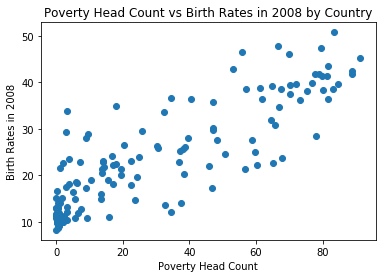

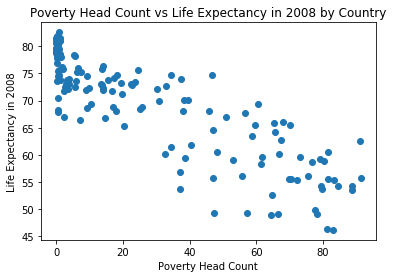

,Country Name,Country Code,Series Name,Series Code,2008,2009,2010,2011,2012
0,Albania,ALB,Poverty headcount ratio at $3.20 a day (2011 P...,SI.POV.LMIC,6.5,7.1,7.1,7.1,7.7
1,Algeria,DZA,Poverty headcount ratio at $3.20 a day (2011 P...,SI.POV.LMIC,3.9,3.9,3.9,3.9,3.9
2,Angola,AGO,Poverty headcount ratio at $3.20 a day (2011 P...,SI.POV.LMIC,55.7,55.7,55.7,55.7,55.7
3,Argentina,ARG,Poverty headcount ratio at $3.20 a day (2011 P...,SI.POV.LMIC,6.2,6.0,3.7,2.6,2.7
4,Armenia,ARM,Poverty headcount ratio at $3.20 a day (2011 P...,SI.POV.LMIC,13.6,19.2,20.5,18.8,17.1


In [38]:
plt.scatter(povVBir[2008],birth[2008])
plt.title('Poverty Head Count vs Birth Rates in 2008 by Country')
plt.xlabel('Poverty Head Count')
plt.ylabel('Birth Rates in 2008')
plt.show()

plt.scatter(povVExp[2008],exp[2008])
plt.title('Poverty Head Count vs Life Expectancy in 2008 by Country')
plt.xlabel('Poverty Head Count')
plt.ylabel('Life Expectancy in 2008')
plt.show()

povVBir.head()

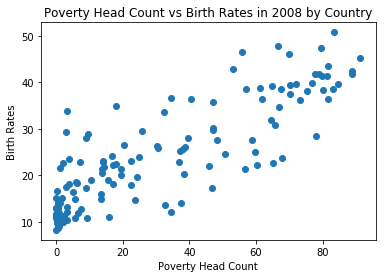

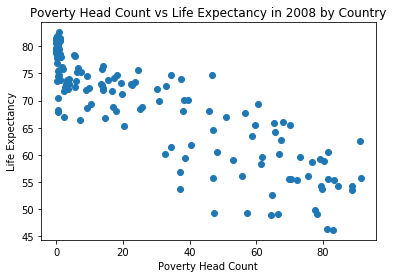

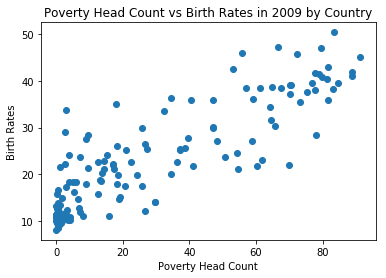

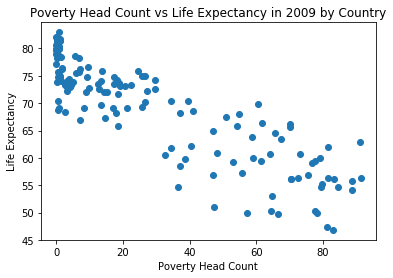

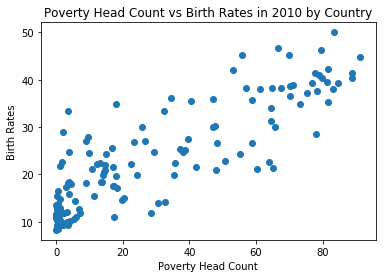

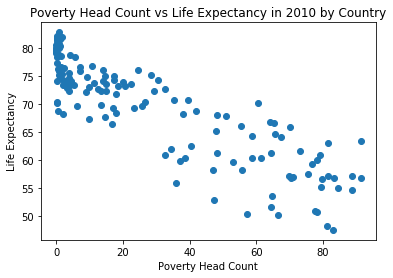

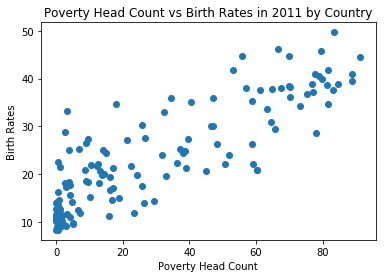

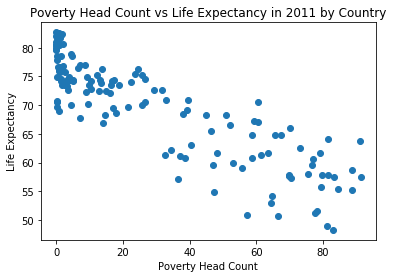

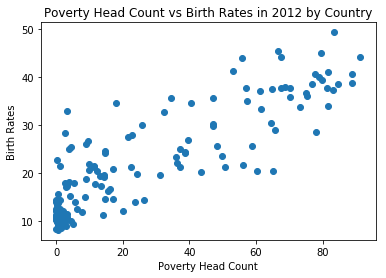

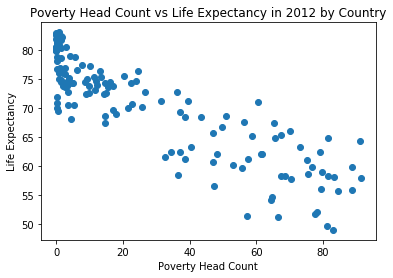

In [39]:
#sb.jointplot(data.total_bill,data.tip,kind='reg')
fig1=plt.figure()
plt.scatter(povVBir[2008],birth[2008])
plt.title('Poverty Head Count vs Birth Rates in 2008 by Country')
plt.xlabel('Poverty Head Count')
plt.ylabel('Birth Rates')
plt.show()
#fig1.savefig('2008_Poverty_Head_Count_vs_Birth_Rates.jpg')

fig2=plt.figure()
plt.scatter(povVExp[2008],exp[2008])
plt.title('Poverty Head Count vs Life Expectancy in 2008 by Country')
plt.xlabel('Poverty Head Count')
plt.ylabel('Life Expectancy')
plt.show()
#fig2.savefig('2008_Poverty_Head_Count_vs_Life_Expectancy.jpg')


fig3=plt.figure()
plt.scatter(povVBir[2009],birth[2009])
plt.title('Poverty Head Count vs Birth Rates in 2009 by Country')
plt.xlabel('Poverty Head Count')
plt.ylabel('Birth Rates')
plt.show()
#fig3.savefig('2009_Poverty_Head_Count_vs_Birth_Rates.jpg')

fig4=plt.figure()
plt.scatter(povVExp[2009],exp[2009])
plt.title('Poverty Head Count vs Life Expectancy in 2009 by Country')
plt.xlabel('Poverty Head Count')
plt.ylabel('Life Expectancy')
plt.show()
#fig4.savefig('2009_Poverty_Head_Count_vs_Life_Expectancy.jpg')


fig5=plt.figure()
plt.scatter(povVBir[2010],birth[2010])
plt.title('Poverty Head Count vs Birth Rates in 2010 by Country')
plt.xlabel('Poverty Head Count')
plt.ylabel('Birth Rates')
plt.show()
#fig5.savefig('2010_Poverty_Head_Count_vs_Birth_Rates.jpg')

fig6=plt.figure()
plt.scatter(povVExp[2010],exp[2010])
plt.title('Poverty Head Count vs Life Expectancy in 2010 by Country')
plt.xlabel('Poverty Head Count')
plt.ylabel('Life Expectancy')
plt.show()
#fig6.savefig('2010_Poverty_Head Count_vs_Life_Expectancy.jpg')


fig7=plt.figure()
plt.scatter(povVBir[2011],birth[2011])
plt.title('Poverty Head Count vs Birth Rates in 2011 by Country')
plt.xlabel('Poverty Head Count')
plt.ylabel('Birth Rates')
plt.show()
#fig7.savefig('2011_Poverty_Head_Count_vs_Birth_Rates.jpg')

fig8=plt.figure()
plt.scatter(povVExp[2011],exp[2011])
plt.title('Poverty Head Count vs Life Expectancy in 2011 by Country')
plt.xlabel('Poverty Head Count')
plt.ylabel('Life Expectancy')
plt.show()
#fig8.savefig('2011_Poverty_Head Count_vs_Life_Expectancy.jpg')



fig9=plt.figure()
plt.scatter(povVBir[2012],birth[2012])
plt.title('Poverty Head Count vs Birth Rates in 2012 by Country')
plt.xlabel('Poverty Head Count')
plt.ylabel('Birth Rates')
plt.show()
#fig9.savefig('2012_Poverty_Head_Count_vs_Birth_Rates.jpg')

fig10=plt.figure()
plt.scatter(povVExp[2012],exp[2012])
plt.title('Poverty Head Count vs Life Expectancy in 2012 by Country')
plt.xlabel('Poverty Head Count')
plt.ylabel('Life Expectancy')
plt.show()
#fig10.savefig('2012_Poverty_Head Count_vs_Life_Expectancy.jpg')






## Making graphs look nice :)

In [40]:
# READ:
# Apart from looking nice, the purpose of displaying these graphs is to show more information such as:
# the pearson r
# the correlation coefficient
# and a linear regression model
# in order to gain a better understanding of what these numbers mean.

import seaborn as sb

/Users/ernie/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/ernie/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 432x288 with 0 Axes>

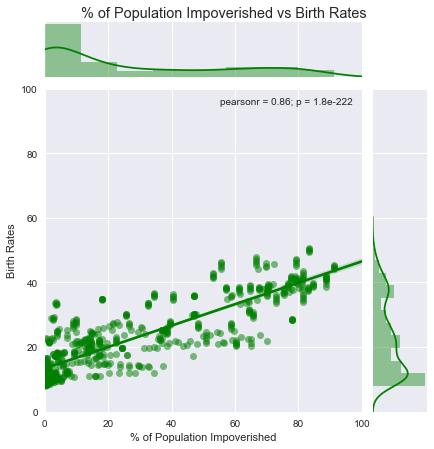

/Users/ernie/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/ernie/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 432x288 with 0 Axes>

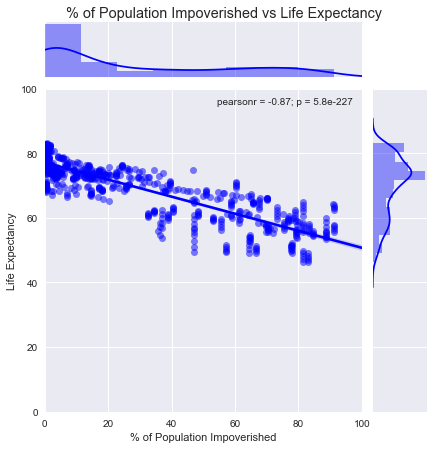

In [116]:
# add columns from two dataframes to a new one
exPVB = povVBir
exBIR = birth
exPVE = povVExp
exEXP = exp

activeYearList = [2008,2009,2010,2011,2012]

exPVBArray=[]
exPVBArray.append(exPVB[2008])
exPVBArray.append(exPVB[2009])
exPVBArray.append(exPVB[2010])
exPVBArray.append(exPVB[2011])
exPVBArray.append(exPVB[2012])
plotPVB=np.array(exPVBArray)

exBIRArray=[]
exBIRArray.append(exBIR[2008])
exBIRArray.append(exBIR[2009])
exBIRArray.append(exBIR[2010])
exBIRArray.append(exBIR[2011])
exBIRArray.append(exBIR[2012])
plotBIR=np.array(exBIRArray)

exPVEArray=[]
exPVEArray.append(exPVE[2008])
exPVEArray.append(exPVE[2009])
exPVEArray.append(exPVE[2010])
exPVEArray.append(exPVE[2011])
exPVEArray.append(exPVE[2012])
plotPVE=np.array(exPVEArray)


exEXPArray=[]
exEXPArray.append(exEXP[2008])
exEXPArray.append(exEXP[2009])
exEXPArray.append(exEXP[2010])
exEXPArray.append(exEXP[2011])
exEXPArray.append(exEXP[2012])
plotEXP=np.array(exEXPArray)

fig11=plt.figure()
sb.set(style='darkgrid')#,color_codes=True)
fig11 = sb.jointplot(plotPVB,plotBIR,kind='reg',xlim=(0,100),ylim=(0,100),color='green',scatter_kws={'alpha':0.5})
fig11.set_axis_labels('% of Population Impoverished','Birth Rates')
plt.suptitle('% of Population Impoverished vs Birth Rates',va='baseline',ha='center')
plt.show()
fig11.savefig('Poverty_Head_Count_vs_Life_Expectancy.jpg')


fig12=plt.figure()
sb.set(style='darkgrid')#,color_codes=True)
fig12=sb.jointplot(plotPVE,plotEXP,kind='reg',xlim=(0,100),ylim=(0,100),color='blue',scatter_kws={'alpha':0.5})
fig12.set_axis_labels('% of Population Impoverished','Life Expectancy')
#plt.title('% of Population Impoverished vs Life Expectancy')
plt.suptitle('% of Population Impoverished vs Life Expectancy',va='baseline',ha='center')
plt.show()
fig12.savefig('Poverty_Head_Count_vs_Birth_Rates.jpg')
